# <font color = ##4854E8> G2M Insight For Cab Investment Firm

## <font color = #950CDF> Part 1: </font> <font color = #4854E8> Import Libraries and Datasets</font>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10, 6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

### <font color = #4854E8> Cab Dataset

In [3]:
cab_df = pd.read_csv("/Users/dilanozkilic/Desktop/Data Glacier Internship/Week 2/Cab_Data.csv")
cab_df.sample(5)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
141155,10173912,42869,Yellow Cab,WASHINGTON DC,39.440,870.340,506.410
317834,10390007,43387,Yellow Cab,LOS ANGELES CA,8.960,146.590,111.821
256053,10313767,43189,Pink Cab,NEW YORK NY,38.610,498.580,424.710
319763,10392259,43393,Pink Cab,NASHVILLE TN,37.950,403.400,425.040
218971,10268081,43073,Yellow Cab,LOS ANGELES CA,37.200,524.330,535.680


In [4]:
cab_df.shape

(359392, 7)

In [5]:
cab_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


Let's rename the features

In [6]:
cab_df.rename(columns=({"Transaction ID":"transaction_id", "Date of Travel":"date_of_travel", "Company":"company", "City":"city" ,"KM Travelled":"km_travelled", "Price Charged":"price_charged", "Cost of Trip":"cost_of_trip"}), inplace=True)

In [7]:
cab_df.head(1)

,transaction_id,date_of_travel,company,city,km_travelled,price_charged,cost_of_trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.450,370.950,313.635


We need to change the dtype of Date of Travel column.

In [8]:
from datetime import date, timedelta

In [9]:
cab_df["date_of_travel"] = cab_df["date_of_travel"].apply(lambda x:date(1899,12,30)+timedelta(days=x))

In [10]:
cab_df["date_of_travel"] = pd.to_datetime(cab_df["date_of_travel"])

In [11]:
cab_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   transaction_id  359392 non-null  int64         
 1   date_of_travel  359392 non-null  datetime64[ns]
 2   company         359392 non-null  object        
 3   city            359392 non-null  object        
 4   km_travelled    359392 non-null  float64       
 5   price_charged   359392 non-null  float64       
 6   cost_of_trip    359392 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 19.2+ MB


In [12]:
cab_df.describe().T

,count,mean,std,min,25%,50%,75%,max
transaction_id,359392.000,10220761.185,126805.804,10000011.000,10110809.750,10221035.500,10330937.250,10440107.000
km_travelled,359392.000,22.567,12.234,1.900,12.000,22.440,32.960,48.000
price_charged,359392.000,423.443,274.379,15.600,206.438,386.360,583.660,2048.030
cost_of_trip,359392.000,286.190,157.994,19.000,151.200,282.480,413.683,691.200


In [13]:
cab_df.city.unique()

array(['ATLANTA GA', 'AUSTIN TX', 'BOSTON MA', 'CHICAGO IL', 'DALLAS TX',
       'DENVER CO', 'LOS ANGELES CA', 'MIAMI FL', 'NASHVILLE TN',
       'NEW YORK NY', 'ORANGE COUNTY', 'PHOENIX AZ', 'PITTSBURGH PA',
       'SACRAMENTO CA', 'SAN DIEGO CA', 'SEATTLE WA', 'SILICON VALLEY',
       'TUCSON AZ', 'WASHINGTON DC'], dtype=object)

### <font color = #4854E8> City Dataset

In [14]:
city = pd.read_csv("/Users/dilanozkilic/Desktop/Data Glacier Internship/Week 2/City.csv")
city.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [15]:
city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


In [16]:
city.rename(columns=({"City":"city", "Population":"population", "Users":"users"}), inplace=True)

In [17]:
city["population"] = city["population"].str.replace(",", "")

In [18]:
city["users"] = city["users"].str.replace(",", "")

In [19]:
city["population"] = city.population.astype(int)
city["users"] = city.users.astype(int)

In [20]:
city.city.unique()

array(['NEW YORK NY', 'CHICAGO IL', 'LOS ANGELES CA', 'MIAMI FL',
       'SILICON VALLEY', 'ORANGE COUNTY', 'SAN DIEGO CA', 'PHOENIX AZ',
       'DALLAS TX', 'ATLANTA GA', 'DENVER CO', 'AUSTIN TX', 'SEATTLE WA',
       'TUCSON AZ', 'SAN FRANCISCO CA', 'SACRAMENTO CA', 'PITTSBURGH PA',
       'WASHINGTON DC', 'NASHVILLE TN', 'BOSTON MA'], dtype=object)

### <font color = #4854E8> Customer Dataset

In [21]:
customer = pd.read_csv("/Users/dilanozkilic/Desktop/Data Glacier Internship/Week 2/Customer_ID.csv")
customer.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [22]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [23]:
customer.rename(columns=({"Customer ID":"customer_id", "Gender":"gender", "Age":"age", "Income (USD/Month)":"income"}), inplace=True)

In [24]:
customer.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_id,49171.000,28398.252,17714.137,1.000,12654.500,27631.000,43284.500,60000.000
age,49171.000,35.363,12.599,18.000,25.000,33.000,42.000,65.000
income,49171.000,15015.632,8002.208,2000.000,8289.500,14656.000,21035.000,35000.000


In [25]:
customer.shape

(49171, 4)

### <font color = #4854E8> Transaction Dataset

In [26]:
transaction = pd.read_csv("/Users/dilanozkilic/Desktop/Data Glacier Internship/Week 2/Transaction_ID.csv")
transaction.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [27]:
transaction.rename(columns=({"Transaction ID":"transaction_id", "Customer ID":"customer_id", "Payment_Mode":"payment_mode"}),inplace=True)

In [28]:
transaction.shape

(440098, 3)

## <font color = #950CDF> Part 2: </font> <font color = #4854E8> Combining Datasets</font>

In [29]:
transaction_cust = transaction.merge(customer, on=["customer_id"])
transaction_cust.sample(5)

,transaction_id,customer_id,payment_mode,gender,age,income
282013,10279091,44137,Cash,Male,58,16126
10277,10263290,4137,Cash,Male,52,26702
147900,10058661,43605,Card,Female,32,20986
160517,10302795,545,Cash,Female,22,24389
291618,10216210,57524,Card,Male,21,2503


In [30]:
transaction_cust.transaction_id.nunique()

440098

In [31]:
cab_city = cab_df.merge(city, on=["city"])
cab_city.sample(5)

,transaction_id,date_of_travel,company,city,km_travelled,price_charged,cost_of_trip,population,users
101823,10189952,2017-06-27,Yellow Cab,DALLAS TX,16.320,306.520,225.216,942908,22157
43205,10006241,2016-02-07,Yellow Cab,CHICAGO IL,24.150,425.690,344.862,1955130,164468
330131,10143086,2017-01-31,Yellow Cab,WASHINGTON DC,22.880,350.270,285.542,418859,127001
103225,10279930,2017-12-20,Pink Cab,DALLAS TX,5.820,77.330,63.438,942908,22157
180975,10069869,2016-08-28,Pink Cab,NEW YORK NY,39.440,679.670,445.672,8405837,302149


In [32]:
cab = cab_city.merge(transaction_cust, on=["transaction_id"])
cab.sample(5)

,transaction_id,date_of_travel,company,city,km_travelled,price_charged,cost_of_trip,population,users,customer_id,payment_mode,gender,age,income
261894,10422043,2018-12-04,Yellow Cab,NEW YORK NY,2.380,53.180,29.417,8405837,302149,2700,Card,Male,27,5159
184459,10083988,2016-09-24,Yellow Cab,NEW YORK NY,31.500,905.250,438.480,8405837,302149,2282,Cash,Male,37,15040
9115,10140136,2017-01-27,Yellow Cab,AUSTIN TX,1.960,58.570,27.754,698371,14978,35840,Card,Female,57,3739
231027,10282446,2017-12-21,Yellow Cab,NEW YORK NY,17.640,422.540,230.731,8405837,302149,1102,Card,Male,23,11789
316752,10010676,2016-02-14,Yellow Cab,WASHINGTON DC,24.960,514.300,350.438,418859,127001,53299,Cash,Female,25,11777


In [33]:
cab.shape

(359392, 14)

##### <font color = #4854E8> Looking if there is any missing values or duplicates;

In [34]:
cab.isnull().sum()

transaction_id    0
date_of_travel    0
company           0
city              0
km_travelled      0
price_charged     0
cost_of_trip      0
population        0
users             0
customer_id       0
payment_mode      0
gender            0
age               0
income            0
dtype: int64

In [35]:
cab.duplicated().sum()

0

##### <font color = #4854E8> Looking at value counts of columns;

In [36]:
columns = cab.columns
columns

Index(['transaction_id', 'date_of_travel', 'company', 'city', 'km_travelled',
       'price_charged', 'cost_of_trip', 'population', 'users', 'customer_id',
       'payment_mode', 'gender', 'age', 'income'],
      dtype='object')

In [37]:
column_objects = []

for i in columns:
    if cab[i].dtype == "object" :
        column_objects.append(i)

In [38]:
for col in column_objects:
    print(col)
    print("--"*8)
    print(cab[col].value_counts(dropna=False))
    print("\n"*2)

company
----------------
Yellow Cab    274681
Pink Cab       84711
Name: company, dtype: int64



city
----------------
NEW YORK NY       99885
CHICAGO IL        56625
LOS ANGELES CA    48033
WASHINGTON DC     43737
BOSTON MA         29692
SAN DIEGO CA      20488
SILICON VALLEY     8519
SEATTLE WA         7997
ATLANTA GA         7557
DALLAS TX          7017
MIAMI FL           6454
AUSTIN TX          4896
ORANGE COUNTY      3982
DENVER CO          3825
NASHVILLE TN       3010
SACRAMENTO CA      2367
PHOENIX AZ         2064
TUCSON AZ          1931
PITTSBURGH PA      1313
Name: city, dtype: int64



payment_mode
----------------
Card    215504
Cash    143888
Name: payment_mode, dtype: int64



gender
----------------
Male      205912
Female    153480
Name: gender, dtype: int64





##### <font color = #4854E8> Creating Subcategories for Age and Income Features;

In [39]:
def mapping_age(age):
    if age > 18 and age <= 25 :
        return "18-25"
    elif age > 25 and age <= 40 :
        return "25-40"
    elif age > 40 and age < 60  :
        return "40-60"
    else:
        return "60+"

In [40]:
cab["age_summary"] = cab.age.transform(mapping_age)

In [41]:
def mapping_income(income):
    if income <= 2500:
        return "low-class"
    elif income > 2500 and income <= 15000 :
        return "middle-class"
    else:
        return "high-class"

In [42]:
cab["income_summary"] = cab.income.transform(mapping_income)

##### <font color = #4854E8> Dropping unnecessary columns;

In [43]:
cab.drop(columns = ["transaction_id" , "customer_id"], inplace=True)

In [44]:
cab.drop(columns = ["age" , "income"], inplace=True)

In [45]:
cab.sample(10)

,date_of_travel,company,city,km_travelled,price_charged,cost_of_trip,population,users,payment_mode,gender,age_summary,income_summary
267804,2016-10-31,Yellow Cab,ORANGE COUNTY,36.400,554.070,476.112,1030185,12994,Card,Female,25-40,high-class
210828,2017-08-05,Yellow Cab,NEW YORK NY,3.180,88.530,42.358,8405837,302149,Card,Female,18-25,middle-class
4426,2017-11-12,Pink Cab,ATLANTA GA,41.040,569.070,467.856,814885,24701,Card,Male,25-40,high-class
344787,2018-01-14,Yellow Cab,WASHINGTON DC,34.200,561.740,418.608,418859,127001,Card,Male,40-60,high-class
81098,2018-02-17,Pink Cab,CHICAGO IL,25.760,304.530,262.752,1955130,164468,Card,Male,25-40,high-class
101809,2017-06-30,Pink Cab,DALLAS TX,37.800,535.970,412.020,942908,22157,Card,Male,25-40,high-class
56421,2016-11-26,Yellow Cab,CHICAGO IL,23.400,396.620,336.960,1955130,164468,Card,Male,40-60,middle-class
100866,2017-01-10,Yellow Cab,DALLAS TX,23.600,370.670,314.352,942908,22157,Cash,Female,25-40,high-class
288144,2017-10-20,Pink Cab,SAN DIEGO CA,19.040,226.310,201.824,959307,69995,Cash,Female,25-40,high-class
356298,2018-11-09,Yellow Cab,WASHINGTON DC,24.250,417.110,291.000,418859,127001,Card,Female,18-25,high-class


## <font color = #950CDF> Part 3: </font> <font color = #4854E8> Investigating the Data</font>

In [46]:
cab["profit"] = cab["price_charged"] - cab["cost_of_trip"]

In [47]:
cab.head(3)

,date_of_travel,company,city,km_travelled,price_charged,cost_of_trip,population,users,payment_mode,gender,age_summary,income_summary,profit
0,2016-01-08,Pink Cab,ATLANTA GA,30.450,370.950,313.635,814885,24701,Card,Male,25-40,middle-class,57.315
1,2016-01-06,Pink Cab,ATLANTA GA,28.620,358.520,334.854,814885,24701,Card,Male,25-40,middle-class,23.666
2,2016-01-02,Pink Cab,ATLANTA GA,9.040,125.200,97.632,814885,24701,Cash,Male,40-60,middle-class,27.568


In [48]:
cab.company.value_counts().sum()

359392

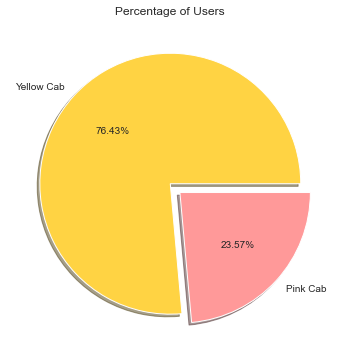

In [49]:
company_pie = cab.company.value_counts()/cab.company.count().sum()

label = ["Yellow Cab", "Pink Cab"]
explode=(0 , 0.1)
colors = ['#ffd343','#ff9999']
plt.pie(company_pie, explode=explode, labels = label, colors=colors, autopct='%.2f%%', shadow=True)
plt.title("Percentage of Users");

### 3.1. Profit 

#### Average Profit per Ride by Year

In [50]:
cab['year'] = cab['date_of_travel'].dt.year
cab['month'] = cab['date_of_travel'].dt.month
cab['day'] = cab['date_of_travel'].dt.dayofweek

In [51]:
cab.groupby("company")["profit"].sum()/cab["company"].value_counts()

Pink Cab      62.652
Yellow Cab   160.260
dtype: float64

In [52]:
cab.groupby(['company', 'year'])[['profit']].mean()

profit
company    year        
Pink Cab   2016  68.322
           2017  67.071
           2018  53.230
Yellow Cab 2016 169.348
           2017 168.817
           2018 143.416

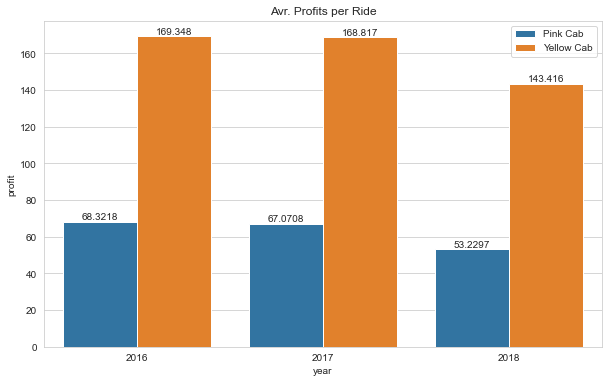

In [53]:
plt.title("Avr. Profits per Ride")
ax = sns.barplot(data=cab, x="year" , y="profit",hue="company", ci=False)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.legend();

#### Avarage profit per km

In [54]:
cab["profit_per_km"] = cab["profit"]/cab["km_travelled"]

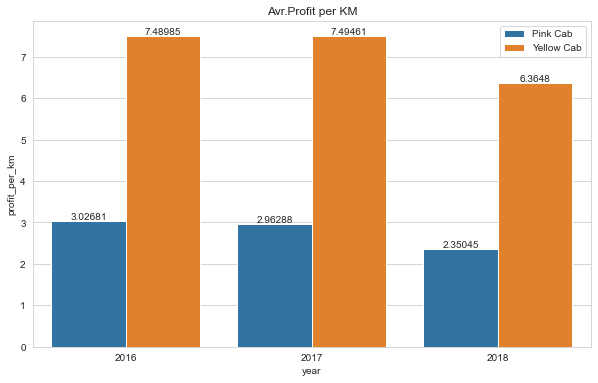

In [55]:
plt.title("Avr.Profit per KM")
ax = sns.barplot(data=cab, x="year", y="profit_per_km", hue="company", ci=False)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.legend();

#### Profitable Rides

In [56]:
def mapping_profit(profit):
    if profit <= 0:
        return "no-profit"
    else:
        return "profit"

In [57]:
cab["profit_type"] = cab.profit.transform(mapping_profit)

In [58]:
a = cab.groupby(["year", "company"])["profit_type"].value_counts(normalize=True).to_frame()
a.columns = ["percentages"]
a.reset_index(inplace=True)
b=a[a["profit_type"] == "profit"]
b

,year,company,profit_type,percentages
0,2016,Pink Cab,profit,0.871
2,2016,Yellow Cab,profit,0.953
4,2017,Pink Cab,profit,0.856
6,2017,Yellow Cab,profit,0.948
8,2018,Pink Cab,profit,0.880
10,2018,Yellow Cab,profit,0.950


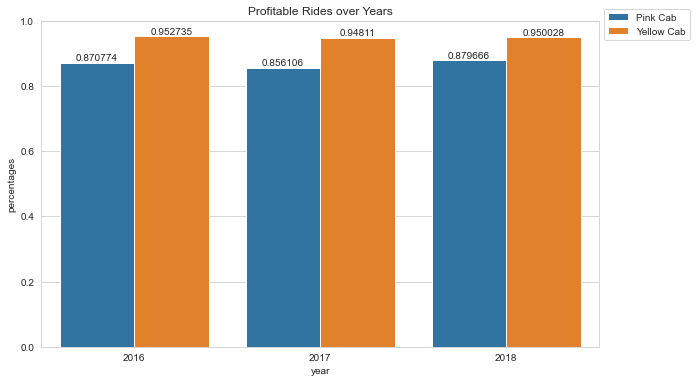

In [59]:
plt.title("Profitable Rides over Years")
ax = sns.barplot(data=b, x="year", y="percentages", hue="company")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.legend(bbox_to_anchor=(1.0, 1.05));

#### Conclusion

Yellow Cab profits twice as much as Pink Cab. 

### 3.2 Yearly Profit Analysis

In [60]:
df = cab.groupby(["year", "company"], as_index=False)["profit"].sum()
df

,year,company,profit
0,2016,Pink Cab,1713511.224
1,2016,Yellow Cab,13926995.432
2,2017,Pink Cab,2033654.908
3,2017,Yellow Cab,16575977.968
4,2018,Pink Cab,1560162.189
5,2018,Yellow Cab,13517399.771


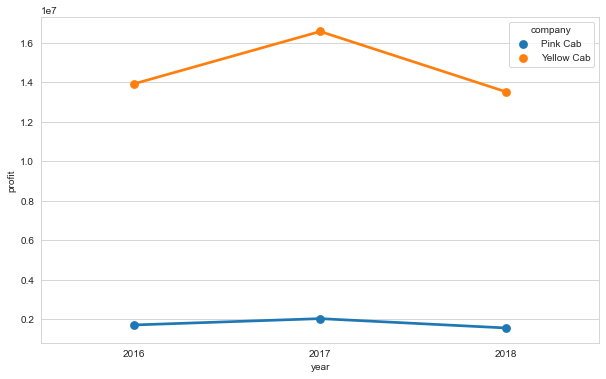

In [61]:
ax = sns.pointplot(data=df, x="year", y="profit", hue="company");

#### Conclusion

Both companies have the best margin on 2017 and a decreased margin in 2018.

### 3.3 Monthly Profit Analysis

In [62]:
df2 = cab.groupby(["month", "year", "company"], as_index=False)["city"].count()

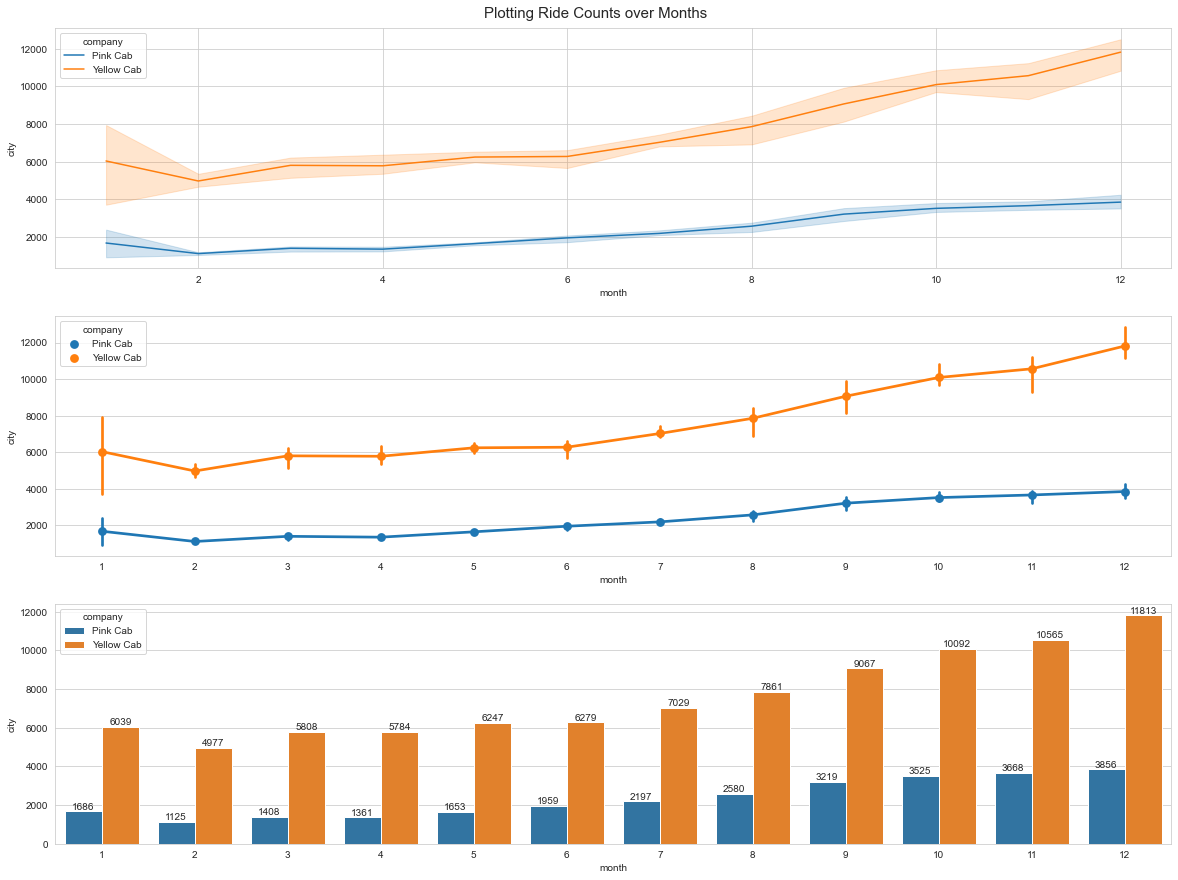

In [63]:
fig = plt.figure(figsize=(20,15))

fig.suptitle("Plotting Ride Counts over Months", y=0.9, fontsize = 15)

plt.subplot(3,1,1)

sns.lineplot(x=df2.month, y=df2.city, hue=df2.company)

plt.subplot(3,1,2)

sns.pointplot(x=df2.month, y=df2.city, hue=df2.company)

plt.subplot(3,1,3)

ax = sns.barplot(x=df2.month, y=df2.city, ci=None, hue=df2.company)

for container in ax.containers:
    ax.bar_label(container, fmt="%.0f")

In [64]:
df1 = cab.groupby(["month", "year", "company"], as_index=False)["profit"].sum()

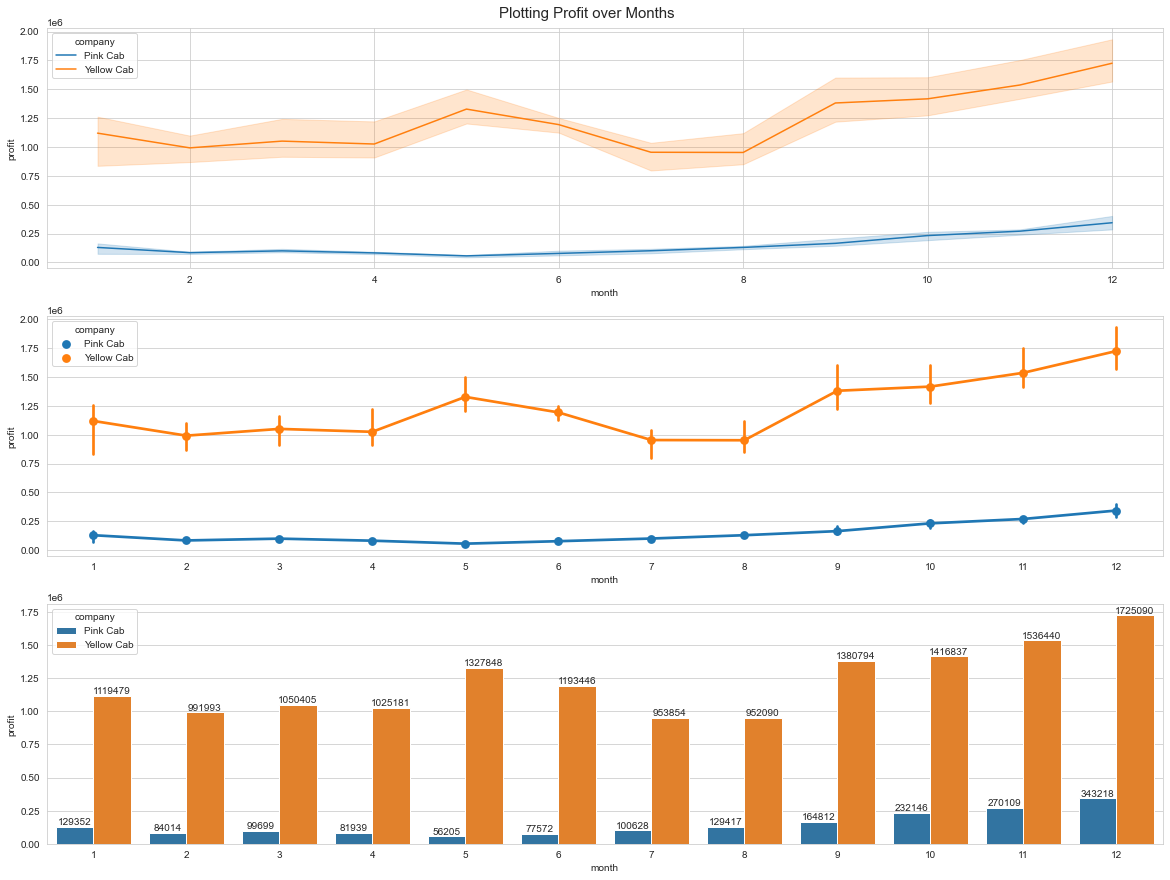

In [65]:
fig = plt.figure(figsize=(20,15))

fig.suptitle("Plotting Profit over Months", y=0.9, fontsize = 15)

plt.subplot(3,1,1)

sns.lineplot(x=df1.month, y=df1.profit, hue=df1.company)

plt.subplot(3,1,2)

sns.pointplot(x=df1.month, y=df1.profit, hue=df1.company)

plt.subplot(3,1,3)

ax = sns.barplot(x=df1.month, y=df1.profit, ci=None, hue=df1.company)

for container in ax.containers:
    ax.bar_label(container, fmt="%.0f")
    

#### Conclusion

Both companies tend to have increased profit during autumn and winter months. Number of transactions also increase in winter and have a peak in December.

#### Plotting Monthly Profit over Years

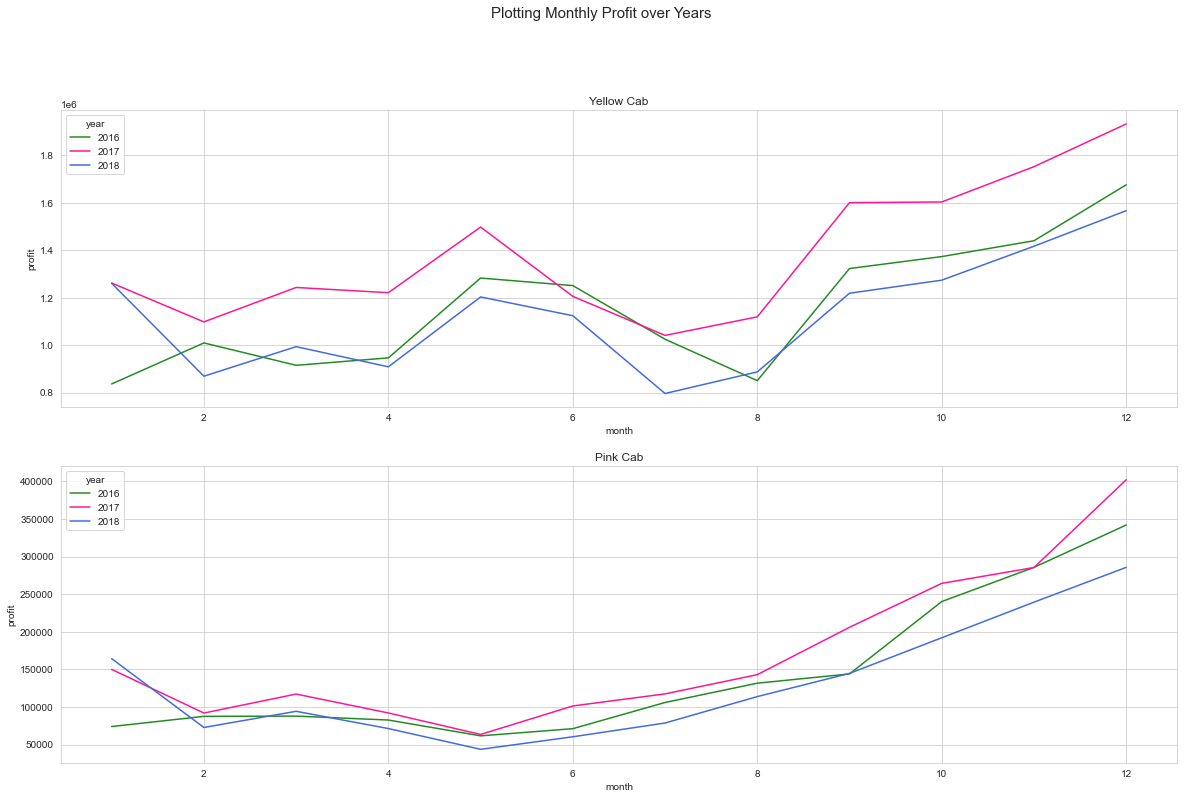

In [66]:
fig = plt.figure(figsize=(20,12))

fig.suptitle("Plotting Monthly Profit over Years", y=1.0, fontsize = 15)

plt.subplot(2,1,1)

ax1 = sns.lineplot(data=df1[df1["company"]=="Yellow Cab"], x="month", y="profit", hue="year", palette=["forestgreen", "deeppink", "royalblue"])

plt.subplot(2,1,2)

ax2 = sns.lineplot(data=df1[df1["company"]=="Pink Cab"], x="month", y="profit", hue="year", palette=["forestgreen", "deeppink", "royalblue"])

ax1.set_title("Yellow Cab")
ax2.set_title("Pink Cab");

#### Plotting Daily Rides over Week

In [115]:
def mapping_day(day):
    if day == 0:
        return "Monday"
    elif day == 1:
        return "Tuesday"
    elif day == 2:
        return "Wednesday"
    elif day == 3:
        return "Thursday"
    elif day == 4:
        return "Friday"
    elif day == 5:
        return "Saturday"
    else:
        return "Sunday"

In [118]:
df3 = cab.groupby(["day", "company"], as_index=False)["date_of_travel"].count()

In [119]:
df3["day"]=df3.day.transform(mapping_day)

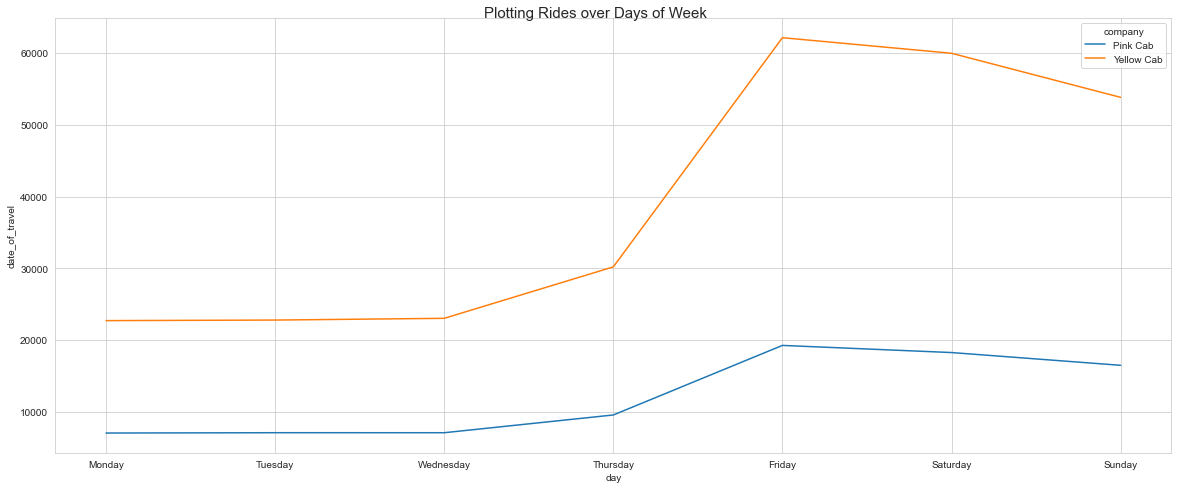

In [122]:
fig = plt.figure(figsize=(20,8))

fig.suptitle("Plotting Rides over Days of Week", y=0.9, fontsize = 15)

sns.lineplot(x=df3.day, y=df3.date_of_travel, hue=df3.company);

#### Conclusion

Both companies tend to have more transactions on weekends.

### 3.4 Gender

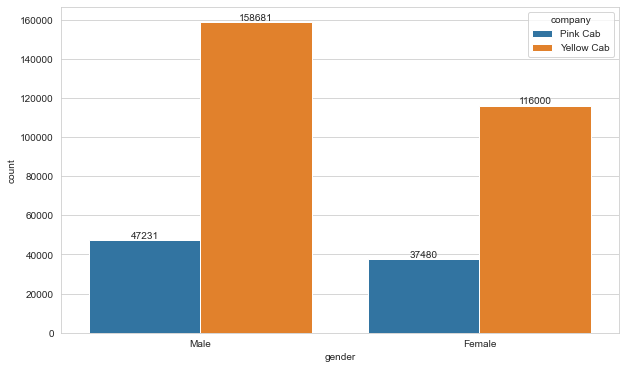

In [71]:
ax = sns.countplot(x=cab.gender, hue=cab.company)

for container in ax.containers:
    ax.bar_label(container, fmt="%.0f")
    

#### Gender Distribution

In [72]:
b = cab.groupby(["company", "gender"])["gender"].count().unstack(level=0)
b

company,Pink Cab,Yellow Cab
gender,,
Female,37480,116000
Male,47231,158681


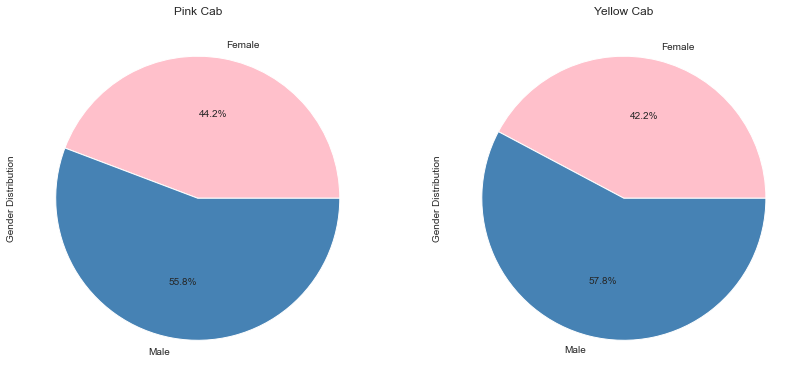

In [73]:
colors = ['pink', 'steelblue']

ax = b.plot(kind="pie", subplots=True, figsize=(14, 8), layout=(1,2), autopct='%1.1f%%', 
            title=["Pink Cab", "Yellow Cab"],
            legend=False, colors=colors,
            ylabel="Gender Distribution");

#### Profit by Gender

In [74]:
a = cab.groupby(["company", "gender"])["profit"].sum().unstack(level=0)
a

company,Pink Cab,Yellow Cab
gender,,
Female,2330532.691,18131417.653
Male,2976795.630,25888955.518


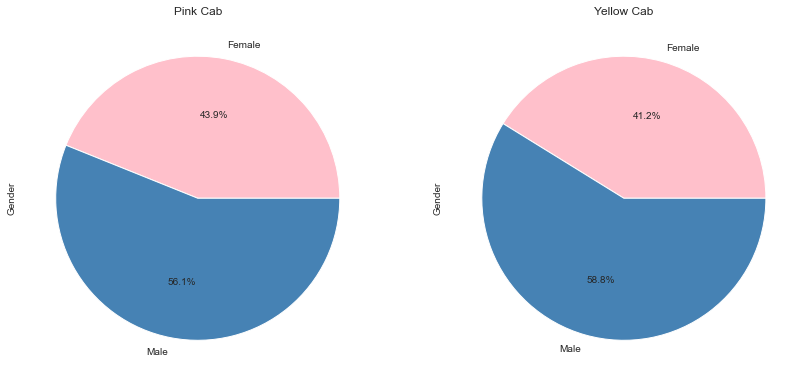

In [75]:
colors = ['pink', 'steelblue']

ax = a.plot(kind="pie", subplots=True, figsize=(14, 8), layout=(1,2), autopct='%1.1f%%', 
            title=["Pink Cab", "Yellow Cab"],
            legend=False, colors=colors,
            ylabel="Gender");

#### Conclusion

Gender doesn't have a significant effect on profit.

### 3.5 Age

In [76]:
c = cab.groupby(["company", "age_summary"])["age_summary"].count().unstack(level=0)
c

company,Pink Cab,Yellow Cab
age_summary,,
18-25,19444,63054
25-40,39989,129805
40-60,17173,56395
60+,8105,25427


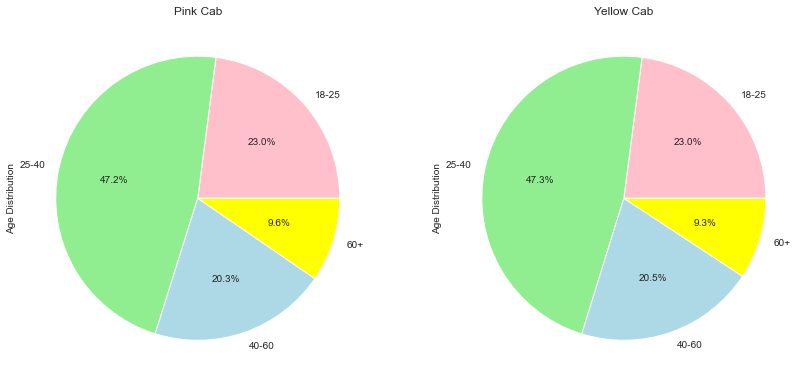

In [77]:
colors = ['pink', "lightgreen", 'lightblue', "yellow"]

ax = c.plot(kind="pie", subplots=True, figsize=(14, 8), layout=(1,2), autopct='%1.1f%%', 
            title=["Pink Cab", "Yellow Cab"],
            legend=False, colors=colors,
            ylabel="Age Distribution");

#### Profit Distirubtion by Age Groups

In [78]:
d = cab.groupby(["company", "age_summary"])["profit"].sum().unstack(level=0)
d

company,Pink Cab,Yellow Cab
age_summary,,
18-25,1238112.468,10100821.882
25-40,2500926.296,20776985.208
40-60,1065296.939,9119450.202
60+,502992.618,4023115.878


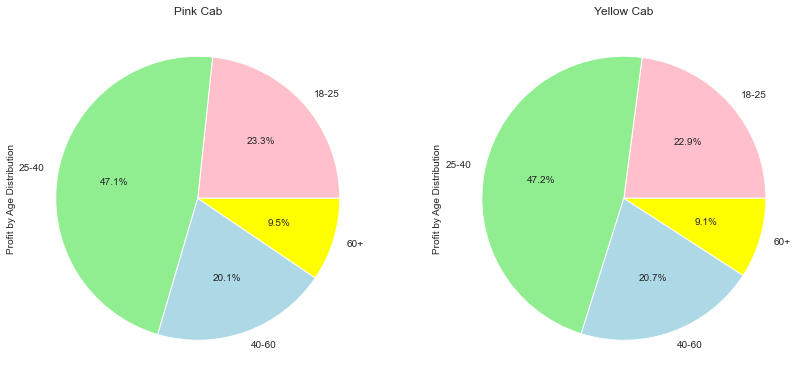

In [79]:
colors = ['pink', "lightgreen", 'lightblue', "yellow"]

ax = d.plot(kind="pie", subplots=True, figsize=(14, 8), layout=(1,2), autopct='%1.1f%%', 
            title=["Pink Cab", "Yellow Cab"],
            legend=False, colors=colors,
            ylabel="Profit by Age Distribution");

#### Conclusion

Almost half of the customers of both companies are in 25-40 age group. Age is not significantly important for profit.

### 3.6 Income

In [80]:
e = cab.groupby(["company", "income_summary"])["income_summary"].count().unstack(level=0)
e

company,Pink Cab,Yellow Cab
income_summary,,
high-class,41456,134064
low-class,1709,5302
middle-class,41546,135315


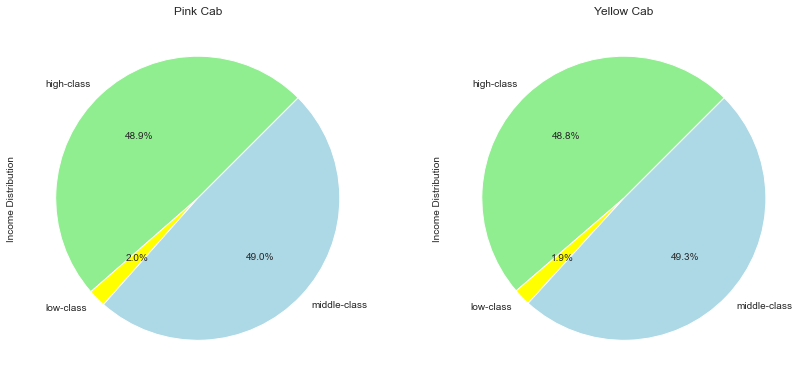

In [81]:
colors = ['lightgreen', "yellow", "lightblue"]

ax = e.plot(kind="pie", subplots=True, figsize=(14, 8), layout=(1,2), autopct='%1.1f%%',
            startangle=45,
            title=["Pink Cab", "Yellow Cab"],
            legend=False, colors=colors,
            ylabel="Income Distribution");

In [82]:
f = cab.groupby(["company", "income_summary"])["profit"].sum().unstack(level=0)
f

company,Pink Cab,Yellow Cab
income_summary,,
high-class,2620362.463,21760986.224
low-class,107193.444,842536.069
middle-class,2579772.414,21416850.878


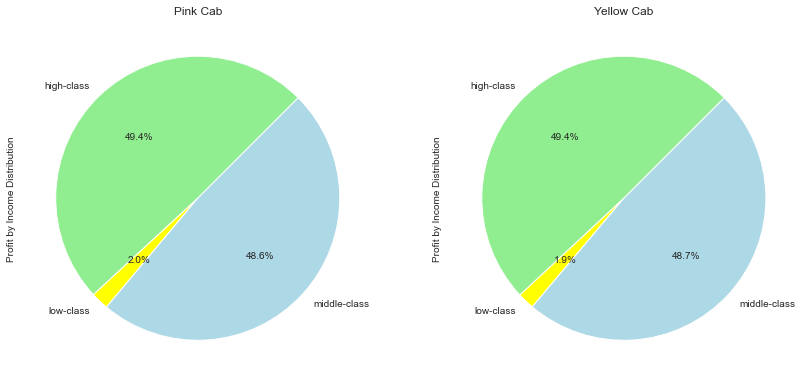

In [83]:
colors = ['lightgreen', "yellow", "lightblue"]

ax = f.plot(kind="pie", subplots=True, figsize=(14, 8), layout=(1,2), autopct='%1.1f%%', 
            title=["Pink Cab", "Yellow Cab"],
            startangle=45,
            legend=False, colors=colors,
            ylabel="Profit by Income Distribution");

### 3.7 Price 

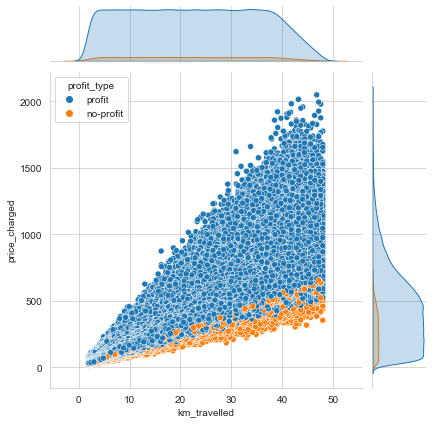

In [125]:
sns.jointplot(data=cab, x="km_travelled", y="price_charged", hue="profit_type");

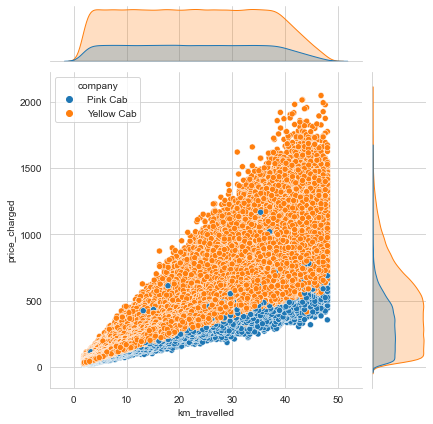

In [126]:
sns.jointplot(data=cab, x="km_travelled", y="price_charged", hue="company");

#### Conclusion

Price has a significant effect on profit. Yellow cab charges much more than pink cab which has a positive effect on profit. 

### 3.8 Payment Mode

In [129]:
g = cab.groupby(["company", "payment_mode"])["payment_mode"].count().unstack(level=0)
g

company,Pink Cab,Yellow Cab
payment_mode,,
Card,50719,164785
Cash,33992,109896


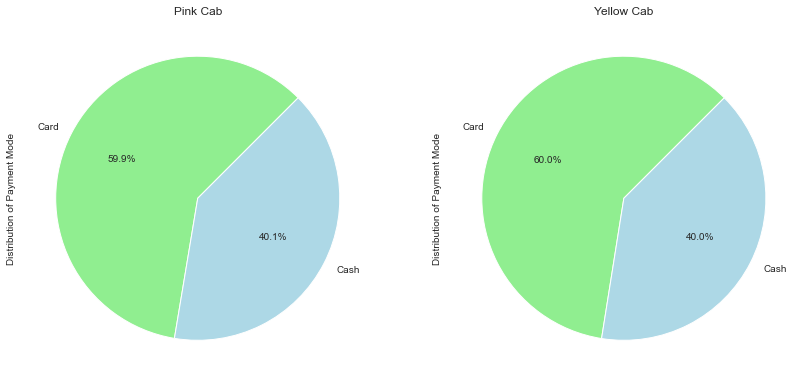

In [130]:
colors = ['lightgreen', "lightblue"]

ax = g.plot(kind="pie", subplots=True, figsize=(14, 8), layout=(1,2), autopct='%1.1f%%', 
            title=["Pink Cab", "Yellow Cab"],
            startangle=45,
            legend=False, colors=colors,
            ylabel="Distribution of Payment Mode");

In [131]:
h = cab.groupby(["company", "payment_mode"])["profit"].sum().unstack(level=0)
h

company,Pink Cab,Yellow Cab
payment_mode,,
Card,3180602.789,26362077.902
Cash,2126725.532,17658295.268


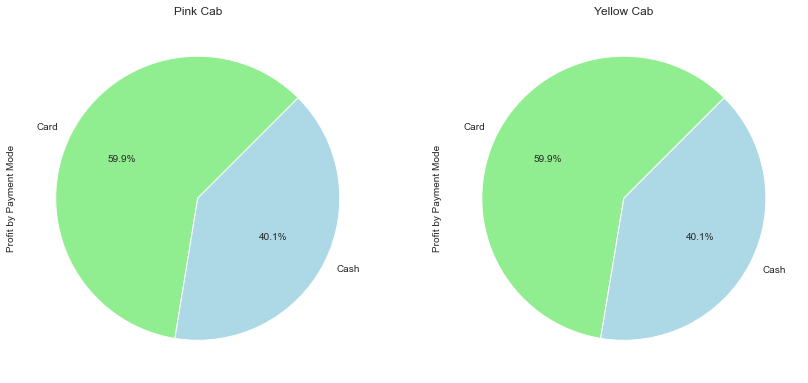

In [133]:
colors = ['lightgreen',"lightblue"]

ax = h.plot(kind="pie", subplots=True, figsize=(14, 8), layout=(1,2), autopct='%1.1f%%', 
            title=["Pink Cab", "Yellow Cab"],
            startangle=45,
            legend=False, colors=colors,
            ylabel="Profit by Payment Mode");

#### Conclusion

Payment mode is not significantly important for profit.

### 4. Possible Reasons for No Profit Rides

In [84]:
no_profit = cab[cab["profit_type"]=="no-profit"]
profit = cab[cab["profit_type"]=="profit"]

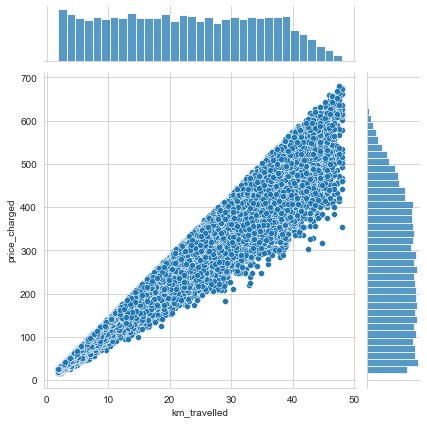

In [85]:
sns.jointplot(data=no_profit, x="km_travelled", y="price_charged")

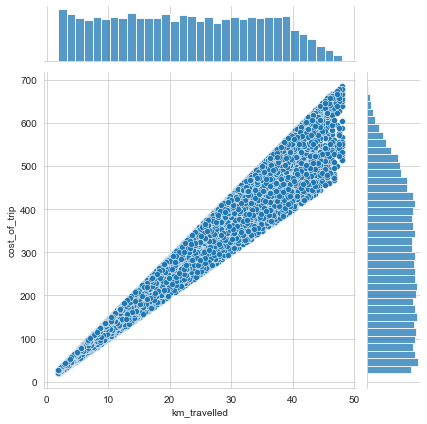

In [86]:
sns.jointplot(data=no_profit, x="km_travelled", y="cost_of_trip")

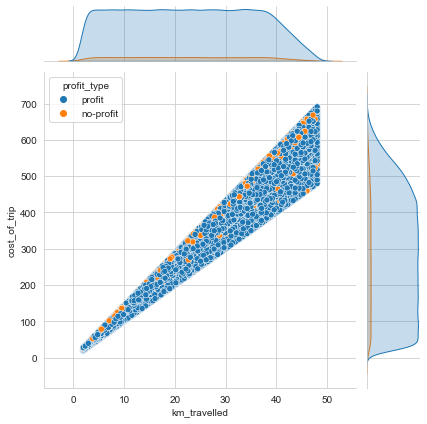

In [87]:
sns.jointplot(data=cab, x="km_travelled", y="cost_of_trip", hue="profit_type")

On the table below, you see that the price doesnt increase as it should, compared with the km travelled

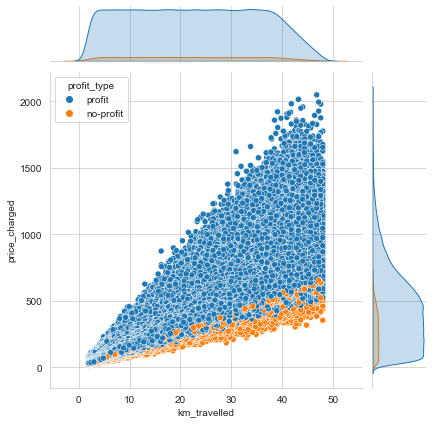

In [88]:
sns.jointplot(data=cab, x="km_travelled", y="price_charged", hue="profit_type")

In [93]:
cab_copy = cab.copy()

In [94]:
cab_copy["price/km"] = cab.price_charged/cab.km_travelled

In [95]:
cab_copy.groupby("city")["price/km"].mean().sort_values(ascending=False)

city
NEW YORK NY      25.330
DALLAS TX        19.876
SILICON VALLEY   18.980
MIAMI FL         17.700
ATLANTA GA       17.687
ORANGE COUNTY    17.502
AUSTIN TX        17.179
DENVER CO        17.016
WASHINGTON DC    16.536
PHOENIX AZ       16.456
LOS ANGELES CA   16.341
SEATTLE WA       15.786
TUCSON AZ        15.512
SAN DIEGO CA     15.493
CHICAGO IL       15.474
BOSTON MA        15.462
PITTSBURGH PA    14.796
SACRAMENTO CA    14.119
NASHVILLE TN     14.009
Name: price/km, dtype: float64

In [96]:
profit["price/km"] = profit.price_charged/profit.km_travelled
no_profit["price/km"] = no_profit.price_charged/no_profit.km_travelled

In [97]:
profit.groupby("city")["price/km"].mean().sort_values(ascending=False)

city
NEW YORK NY      25.396
DALLAS TX        20.730
SILICON VALLEY   19.094
MIAMI FL         18.085
DENVER CO        18.064
ATLANTA GA       18.018
ORANGE COUNTY    17.891
AUSTIN TX        17.474
PHOENIX AZ       17.293
WASHINGTON DC    16.837
LOS ANGELES CA   16.687
SEATTLE WA       16.330
PITTSBURGH PA    16.323
TUCSON AZ        16.179
CHICAGO IL       16.016
BOSTON MA        15.926
SAN DIEGO CA     15.763
NASHVILLE TN     15.038
SACRAMENTO CA    14.943
Name: price/km, dtype: float64

In [98]:
no_profit.groupby("city")["price/km"].mean().sort_values(ascending=False)

city
WASHINGTON DC    12.730
BOSTON MA        12.246
CHICAGO IL       12.129
TUCSON AZ        11.530
AUSTIN TX        11.447
SAN DIEGO CA     11.397
LOS ANGELES CA   11.193
SACRAMENTO CA    11.169
ORANGE COUNTY    11.153
ATLANTA GA       11.129
SEATTLE WA       11.069
NEW YORK NY      10.852
SILICON VALLEY   10.812
MIAMI FL         10.729
NASHVILLE TN     10.569
PHOENIX AZ       10.356
PITTSBURGH PA    10.356
DENVER CO        10.036
DALLAS TX         9.671
Name: price/km, dtype: float64

In [99]:
profit["company"].value_counts(normalize=True)

Yellow Cab   0.780
Pink Cab     0.220
Name: company, dtype: float64

In [100]:
no_profit["company"].value_counts(normalize=True)

Yellow Cab   0.552
Pink Cab     0.448
Name: company, dtype: float64

In [101]:
cab_copy.groupby("company")["price/km"].mean()

company
Pink Cab     13.769
Yellow Cab   20.306
Name: price/km, dtype: float64

In [102]:
cab_copy.groupby(["city", "company"])[["price/km"]].mean()

price/km
city           company             
ATLANTA GA     Pink Cab      13.413
               Yellow Cab    18.987
AUSTIN TX      Pink Cab      14.601
               Yellow Cab    18.769
BOSTON MA      Pink Cab      13.233
               Yellow Cab    15.933
CHICAGO IL     Pink Cab      12.505
               Yellow Cab    16.062
DALLAS TX      Pink Cab      11.812
               Yellow Cab    21.850
DENVER CO      Pink Cab      12.262
               Yellow Cab    19.742
LOS ANGELES CA Pink Cab      13.497
               Yellow Cab    18.346
MIAMI FL       Pink Cab      14.600
               Yellow Cab    19.093
NASHVILLE TN   Pink Cab      12.488
               Yellow Cab    16.404
NEW YORK NY    Pink Cab      15.790
               Yellow Cab    26.881
ORANGE COUNTY  Pink Cab      14.029
               Yellow Cab    19.630
PHOENIX AZ     Pink Cab      12.892
               Yellow Cab    19.022
PITTSBURGH PA  Pink Cab      12.065
               Yellow Cab    17.748
SACRAMENTO CA  Pink Cab      12.821
               Yellow Cab    15.795
SAN DIEGO CA   Pink Cab      13.639
               Yellow Cab    17.509
SEATTLE WA     Pink Cab      12.841
               Yellow Cab    17.315
SILICON VALLEY Pink Cab      14.903
               Yellow Cab    22.258
TUCSON AZ      Pink Cab      14.283
               Yellow Cab    16.380
WASHINGTON DC  Pink Cab      13.310
               Yellow Cab    16.833

In [103]:
no_profit.groupby(["company", "city"])[["price/km"]].mean()

price/km
company    city                    
Pink Cab   ATLANTA GA        10.398
           AUSTIN TX         10.498
           BOSTON MA         10.407
           CHICAGO IL        10.388
           DALLAS TX          9.663
           DENVER CO          9.819
           LOS ANGELES CA    10.646
           MIAMI FL          10.112
           NASHVILLE TN      10.049
           NEW YORK NY       10.852
           ORANGE COUNTY     10.379
           PHOENIX AZ         9.962
           PITTSBURGH PA      9.873
           SACRAMENTO CA     10.350
           SAN DIEGO CA      10.732
           SEATTLE WA        10.266
           SILICON VALLEY    10.812
           TUCSON AZ         10.178
           WASHINGTON DC     10.684
Yellow Cab ATLANTA GA        13.484
           AUSTIN TX         13.002
           BOSTON MA         12.693
           CHICAGO IL        12.804
           DALLAS TX         13.944
           DENVER CO         13.323
           LOS ANGELES CA    13.144
           MIAMI FL          13.323
           NASHVILLE TN      12.567
           ORANGE COUNTY     13.205
           PHOENIX AZ        13.230
           PITTSBURGH PA     12.292
           SACRAMENTO CA     12.376
           SAN DIEGO CA      13.191
           SEATTLE WA        12.897
           TUCSON AZ         12.395
           WASHINGTON DC     13.047

In [104]:
profit.groupby(["company", "city"])[["price/km"]].mean()

price/km
company    city                    
Pink Cab   ATLANTA GA        13.975
           AUSTIN TX         14.956
           BOSTON MA         13.699
           CHICAGO IL        13.157
           DALLAS TX         13.197
           DENVER CO         13.498
           LOS ANGELES CA    13.882
           MIAMI FL          15.309
           NASHVILLE TN      13.527
           NEW YORK NY       15.956
           ORANGE COUNTY     14.482
           PHOENIX AZ        13.887
           PITTSBURGH PA     13.492
           SACRAMENTO CA     13.563
           SAN DIEGO CA      13.915
           SEATTLE WA        13.525
           SILICON VALLEY    15.033
           TUCSON AZ         14.924
           WASHINGTON DC     13.656
Yellow Cab ATLANTA GA        19.070
           AUSTIN TX         18.948
           BOSTON MA         16.387
           CHICAGO IL        16.508
           DALLAS TX         21.851
           DENVER CO         19.825
           LOS ANGELES CA    18.472
           MIAMI FL          19.179
           NASHVILLE TN      16.939
           NEW YORK NY       26.881
           ORANGE COUNTY     19.798
           PHOENIX AZ        19.170
           PITTSBURGH PA     18.396
           SACRAMENTO CA     16.662
           SAN DIEGO CA      17.664
           SEATTLE WA        17.537
           SILICON VALLEY    22.258
           TUCSON AZ         17.080
           WASHINGTON DC     17.115

In [105]:
cab_copy.groupby("company")["profit_type"].value_counts(normalize=True).unstack(level=0)

company,Pink Cab,Yellow Cab
profit_type,,
no-profit,0.131,0.050
profit,0.869,0.950


In [106]:
cab_copy[cab_copy["company"]=="Yellow Cab"].groupby("profit_type")[["price/km"]].mean()

,price/km
profit_type,
no-profit,12.852
profit,20.697


In [107]:
cab_copy[cab_copy["company"]=="Pink Cab"].groupby("profit_type")[["price/km"]].mean()

,price/km
profit_type,
no-profit,10.396
profit,14.279


In [108]:
cab_copy[cab_copy["company"]=="Yellow Cab"].groupby(["profit_type", "city"])[["price/km"]].mean()

price/km
profit_type city                    
no-profit   ATLANTA GA        13.484
            AUSTIN TX         13.002
            BOSTON MA         12.693
            CHICAGO IL        12.804
            DALLAS TX         13.944
            DENVER CO         13.323
            LOS ANGELES CA    13.144
            MIAMI FL          13.323
            NASHVILLE TN      12.567
            ORANGE COUNTY     13.205
            PHOENIX AZ        13.230
            PITTSBURGH PA     12.292
            SACRAMENTO CA     12.376
            SAN DIEGO CA      13.191
            SEATTLE WA        12.897
            TUCSON AZ         12.395
            WASHINGTON DC     13.047
profit      ATLANTA GA        19.070
            AUSTIN TX         18.948
            BOSTON MA         16.387
            CHICAGO IL        16.508
            DALLAS TX         21.851
            DENVER CO         19.825
            LOS ANGELES CA    18.472
            MIAMI FL          19.179
            NASHVILLE TN      16.939
            NEW YORK NY       26.881
            ORANGE COUNTY     19.798
            PHOENIX AZ        19.170
            PITTSBURGH PA     18.396
            SACRAMENTO CA     16.662
            SAN DIEGO CA      17.664
            SEATTLE WA        17.537
            SILICON VALLEY    22.258
            TUCSON AZ         17.080
            WASHINGTON DC     17.115

In [109]:
cab_copy[cab_copy["company"]=="Pink Cab"].groupby(["profit_type", "city"])[["price/km"]].mean()

price/km
profit_type city                    
no-profit   ATLANTA GA        10.398
            AUSTIN TX         10.498
            BOSTON MA         10.407
            CHICAGO IL        10.388
            DALLAS TX          9.663
            DENVER CO          9.819
            LOS ANGELES CA    10.646
            MIAMI FL          10.112
            NASHVILLE TN      10.049
            NEW YORK NY       10.852
            ORANGE COUNTY     10.379
            PHOENIX AZ         9.962
            PITTSBURGH PA      9.873
            SACRAMENTO CA     10.350
            SAN DIEGO CA      10.732
            SEATTLE WA        10.266
            SILICON VALLEY    10.812
            TUCSON AZ         10.178
            WASHINGTON DC     10.684
profit      ATLANTA GA        13.975
            AUSTIN TX         14.956
            BOSTON MA         13.699
            CHICAGO IL        13.157
            DALLAS TX         13.197
            DENVER CO         13.498
            LOS ANGELES CA    13.882
            MIAMI FL          15.309
            NASHVILLE TN      13.527
            NEW YORK NY       15.956
            ORANGE COUNTY     14.482
            PHOENIX AZ        13.887
            PITTSBURGH PA     13.492
            SACRAMENTO CA     13.563
            SAN DIEGO CA      13.915
            SEATTLE WA        13.525
            SILICON VALLEY    15.033
            TUCSON AZ         14.924
            WASHINGTON DC     13.656

#### Conclusion

The reason for the rides with no profit seems to be the discounts. When we analyze the price feature of transactions with no profit, we may see that the price per km is much lower than the companies’ normal prices.

For example, yellow cab normally charges 22USD per km for Dallas, but for no profit rides the mean price is 14USD per km. Pink cab tries to profit with a price of 14USD for Dallas and even reduces it to 10USD sometimes.


## <font color = #950CDF> Part 4: </font> <font color = #4854E8> Hypothesis Testing</font>

In [137]:
from scipy import stats

### <font color = #950CDF> Hypothesis 1: </font> <font color = #4854E8> Is there any difference in profit regarding Gender</font>
> <b>H0 :</b> There is no difference regarding Gender in both cab companies. <br><b>H1 :</b> There is difference regarding Gender in both cab companies.

In [161]:
a = cab[(cab["company"]=="Pink Cab") & (cab["gender"]=="Female")].profit.mean()
b = cab[(cab["company"]=="Pink Cab") & (cab["gender"]=="Male")].profit.mean()

In [165]:
_, p_value = stats.ttest_ind(a, b, equal_var=True)

print('P value is ', p_value)

if(p_value < 0.05):
    print('We accept alternative hypothesis (H1) that there is a difference regarding gender for Pink Cab')
else:
    print('We accept null hypothesis (H0) that there is no difference regarding gender for Pink Cab')

P value is  nan
We accept null hypothesis (H0) that there is no difference regarding gender for Pink Cab


In [167]:
a = cab[(cab["company"]=="Yellow Cab") & (cab["gender"]=="Female")].profit.mean()
b = cab[(cab["company"]=="Yellow Cab") & (cab["gender"]=="Male")].profit.mean()

In [168]:
_, p_value = stats.ttest_ind(a, b, equal_var=True)

print('P value is ', p_value)

if(p_value < 0.05):
    print('We accept alternative hypothesis (H1) that there is a difference regarding gender for Yellow Cab')
else:
    print('We accept null hypothesis (H0) that there is no difference regarding gender for Yellow Cab')

P value is  nan
We accept null hypothesis (H0) that there is no difference regarding gender for Yellow Cab


#### There is no difference regarding Gender in both cab companies.